<a href="https://colab.research.google.com/github/prandin/DeepLearning/blob/master/3_WeightInitialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neuron saturation is the case where very high or very low values of z = wx + b diminishes the learning capacity of a model. By now, we have proposed cross-entropy as a way to attenuate the effects neuron saturation. 

But it turns out that pairing cross-entropy with a thoughtful weight initialization reduces the likelihood of neuron saturation in the first place.

Keras offers multiple benefits for neural network training, one of them being that it sensibly chooses the initialization values.

In [30]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import Zeros, RandomNormal
from keras.initializers import glorot_normal, glorot_uniform



In [31]:
n_input = 784 #input nodes
n_dense = 256 #no. of neurons in the dense layer

We prefer the initialization of w and b to be reasonably scaled mainly for two reasons: firstly, larger values of w and b will tend to saturate the neurons. Secondly, any large values would imply that the network has a strong opinion about how the input and output are related. However, these values are unmerited before any actual training.

Giving very low values (=0) would also not fare well. It would simply imply that the inputs and outputs are weakly related. 

We will initialize the biases to zeros because it just makes up a small fraction of the total number of parameters. Weights, on the other hand, must not be initialized in the same way. If the weights and biases are identical, SGD might not have enough starting points to approximate the function. So we will not initialize weights to zero, but to values near zero. We do this by sampling from a standard normal distribution with SD = 1.

In [32]:
b_init = Zeros()
w_init = RandomNormal(stddev = 1.0)

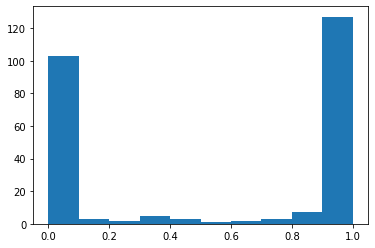

In [33]:
def modelConstruct(activation = 'sigmoid'):
  model = Sequential()
  model.add(Dense(n_dense,
                  input_dim = n_input,
                  kernel_initializer = w_init,
                  bias_initializer = b_init))
  model.add(Activation(activation))
  x = np.random.random((1, n_input))
  a = model.predict(x)
  _ = plt.hist(np.transpose(a))

modelConstruct()

Obviously, the activations are in the range [0, 1]. But the histogram makes it clear that most activations happen to be at the extreme ends. This means that we have encouraged our model to produce large z values, implying that most neurons are saturated, and that the neurons have a strong opinion about how x would influence y prior to any training on data.

In [34]:
w_init = glorot_normal() #Sampling from a Glorot Normal Distribution

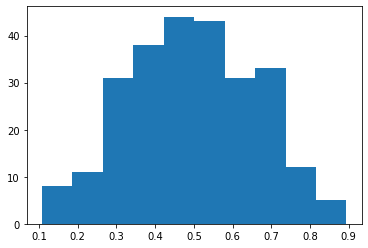

In [35]:
modelConstruct()

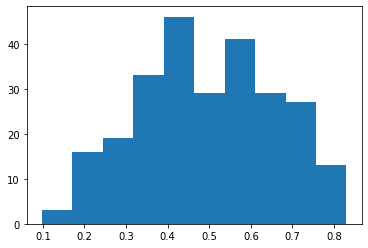

In [36]:
w_init = glorot_uniform() #Sampling from a Glorot Uniform Distribution
modelConstruct()

**Question 1:** Why is it advised NOT to sample initial weights from a standard normal distribution?

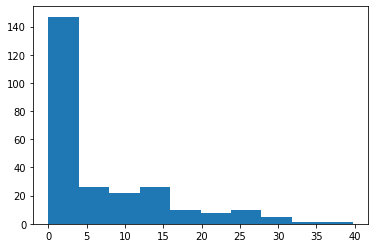

In [37]:
w_init = RandomNormal(stddev = 1.0)
modelConstruct('relu')

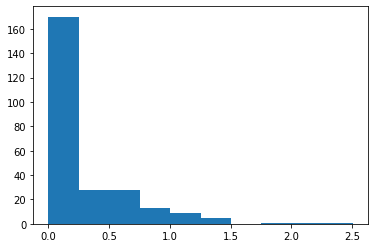

In [38]:
w_init = glorot_normal()
modelConstruct('relu')

Note that while both plots look identical (which may lead to believe there is no change in neuron saturation), the former produced larger activation values (reaching 40), while activations in Glorot_Normal are below 2